In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

이산변수(범주형변수) : ex) 주사위, 학생수, 연령
    
연속변수: 값이 연속적으로 변하는 변수 (ex: 길이, 무게, 시간, 온도)

In [4]:
df = pd.read_csv('data/ch2_scores_em.csv',
                 index_col='student number')
df.head()


,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [6]:
df.count()

english        50
mathematics    50
dtype: int64

In [10]:
scores = df['english'].values
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66],
      dtype=int64)

## 대표값
- 평균값
- 중앙값
- 최빈값

### 평균값

In [12]:
scores.sum() / len(scores)

58.38

In [14]:
scores.mean()

58.38

### 중앙값

In [17]:
np.median(scores)

57.5

In [19]:
# 오름차순으로 정렬
sorted_scores = np.sort(scores)
sorted_scores

array([37, 37, 41, 42, 42, 45, 47, 47, 48, 49, 51, 52, 54, 54, 54, 55, 55,
       55, 56, 56, 57, 57, 57, 57, 57, 58, 61, 61, 62, 62, 62, 63, 64, 64,
       65, 65, 65, 65, 66, 66, 66, 67, 68, 69, 70, 70, 71, 73, 75, 79],
      dtype=int64)

In [20]:
n = len(sorted_scores)

# 갯수가 짝수인 경우 
if n % 2 == 0:
    m0 = sorted_scores[n//2 - 1]
    m1 = sorted_scores[n//2]
    median = (m0 + m1) / 2
    
# 홀수인경우 가운데 인덱스
else:
    median = sorted_scores[ (n+1)//2 - 1 ]
median


57.5

### 최빈값

In [21]:
from scipy.stats import mode

In [24]:
arr = np.array([1,1,1,2,2,3])
m=mode(arr)

print(m)
print(m[0], m[1])

ModeResult(mode=array([1]), count=array([3]))
[1] [3]


In [27]:
data, c = np.unique(arr, return_counts=True)
for a,b in zip(data,c):
    print(a,b)

1 3
2 2
3 1


In [28]:
# 갯수가 많은 데이터를 대표값으로 설정할수 있음
mode(scores)

ModeResult(mode=array([57], dtype=int64), count=array([5]))

## 산포도
- 분산
- 표준편차

### 편차 
: 개별데이터 - 평균값

In [30]:
dt = np.array([1,2,3,4,5])
dt

array([1, 2, 3, 4, 5])

In [32]:
# 편차
d = dt - dt.mean()
d

array([-2., -1.,  0.,  1.,  2.])

In [33]:
d.mean()

0.0

In [34]:
dd = scores - scores.mean()
dd

array([-16.38,  10.62,  -2.38, -17.38,  -1.38, -10.38,   6.62,  -9.38,
         6.62,  -0.38,  11.62, -11.38,  -7.38,   5.62,   3.62,  11.62,
        12.62,   9.62,  14.62, -21.38,   6.62,   6.62,   2.62,  -6.38,
        -1.38,  -1.38,  16.62,   2.62, -11.38,  -4.38,   7.62,  -4.38,
        -4.38, -16.38, -21.38,  20.62,  -2.38,   3.62,   3.62,  -3.38,
         4.62,  -1.38,  -1.38,   8.62,  -3.38, -13.38,   7.62,  -3.38,
         5.62,   7.62])

In [35]:
# 편차의 평균은 0에 가까운수
dd.mean()

-2.5579538487363606e-15

### 분산
: 편차의 제곱의 합을 갯수로 나눈것 (편차의 제곱의 평균)

In [54]:
# 편차의 제곱
aa = (d)**2
aa

array([4., 1., 0., 1., 4.])

In [48]:
# 편차의 제곱의 합 / 데이터 갯수 = 분산
aa.sum()/len(aa) # => aa.mean()

2.0

In [49]:
# 분산
dt.var()

2.0

### 표준편차
: 단위를 맞추기 위한 목적

- 분산을 제곱근

In [55]:
# 루트값 : sqrt

# 편차의 제곱의 평균에 루트 = 표준편차
np.sqrt( aa.mean())

1.4142135623730951

In [52]:
dt.std()

1.4142135623730951

### 데이터 사용

In [57]:
deviation = scores - scores.mean()

In [60]:
summary_df = pd.DataFrame([scores, deviation])
summary_df = summary_df.T #.T 행과 열을 바꿈

In [62]:
summary_df['square of deviation'] = np.square(deviation) # deviation ** 2
summary_df.iloc[:5]

,0,1,square of deviation
0,42.0,-16.38,268.3044
1,69.0,10.62,112.7844
2,56.0,-2.38,5.6644
3,41.0,-17.38,302.0644
4,57.0,-1.38,1.9044


In [66]:
# 분산
summary_df['square of deviation'].sum()/len(summary_df['square of deviation'])

94.1156

In [65]:
# 분산
scores.var()

94.1156

In [68]:
# 표준편차
np.sqrt(scores.var())

9.70131949788275

In [69]:
# 표준편차
scores.std()

9.70131949788275

### 범위

In [70]:
scores.max() - scores.min()

42

In [76]:
Q1 = np.percentile(scores,25)
Q3 = np.percentile(scores,75)
Q3 - Q1

11.0

## 데이터의 정규화
필요이유: 평균이 30점에서 60점 인경우와 평균이 90 점인 경우 60은 평가가 달라야 하므로 
표준화 방법이 필요

In [78]:
dt = np.array([1,2,3,4,5])
dt

array([1, 2, 3, 4, 5])

In [79]:
# 편차
dt - dt.mean()

array([-2., -1.,  0.,  1.,  2.])

In [80]:
# 표준편차
dt.std()

1.4142135623730951

### 정규화
: 결과값이 평균이 0, 표준편차 1
- 편차 / 표준편차

#### 표준화된 데이터는 평균이 0이고 표준편차 1

In [83]:
# 정규화 : 편차 / 표준편차
result = (dt - dt.mean()) / dt.std()
result

array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

In [84]:
result.mean()

0.0

In [85]:
result.std()

0.9999999999999999

#### 평균이 50, 편차 10이 되도록 정규화

In [86]:
# 평균이 0이고 표준편차가 1인 데이터로 만듬
(scores -scores.mean()) / scores.std()

array([-1.68843012,  1.09469645, -0.24532745, -1.79150888, -0.14224869,
       -1.06995755,  0.6823814 , -0.96687878,  0.6823814 , -0.03916993,
        1.19777521, -1.17303631, -0.76072126,  0.57930264,  0.37314512,
        1.19777521,  1.30085397,  0.99161769,  1.5070115 , -2.20382392,
        0.6823814 ,  0.6823814 ,  0.27006636, -0.6576425 , -0.14224869,
       -0.14224869,  1.71316902,  0.27006636, -1.17303631, -0.45148498,
        0.78546016, -0.45148498, -0.45148498, -1.68843012, -2.20382392,
        2.12548406, -0.24532745,  0.37314512,  0.37314512, -0.34840621,
        0.47622388, -0.14224869, -0.14224869,  0.88853893, -0.34840621,
       -1.37919383,  0.78546016, -0.34840621,  0.57930264,  0.78546016])

In [87]:
# 평균이 50이고 표준편차가 10이 되도록 정규화
z = 50 + 10*(scores -scores.mean()) / scores.std()

In [88]:
z.mean()

50.0

In [89]:
z.std()

9.999999999999998

In [91]:
scores_df = pd.DataFrame([scores, z])
scores_df = scores_df.T #.T 행과 열을 바꿈

# 일반 점수와 정규화 점수 표시
scores_df.iloc[:5]

,0,1
0,42.0,33.115699
1,69.0,60.946964
2,56.0,47.546725
3,41.0,32.084911
4,57.0,48.577513


## 도수

### np.historam 의 범위
0<= r <10 <br>
10<= r <20 <br>
20<= r <30 <br>
. <br>
. <br>
. <br>
90<= r<=100<br>


In [94]:
s =[ 9, 10, 18,  20, 30, 45,47, 90, 100]
np.histogram(s, bins = 10) # 10개의 계급으로 나눔

(array([3, 1, 1, 1, 1, 0, 0, 0, 1, 1], dtype=int32),
 array([  9. ,  18.1,  27.2,  36.3,  45.4,  54.5,  63.6,  72.7,  81.8,
         90.9, 100. ]))

In [96]:
s =[ 9, 10, 18,  20, 30, 45,47, 90, 100]
np.histogram(s, bins = 10, range=(0,100)) # 10개의 계급으로 나눔 (range 범위지정)

(array([1, 2, 1, 1, 2, 0, 0, 0, 0, 2], dtype=int32),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]))

### pd.cut 범위
0 < r <=10 <br>
10< r <=20 <br>
20< r <=30 <br>
90< r <=100<br>

In [104]:
sr = pd.Series(s)
pd.cut(sr,bins= range(0,101,10)).value_counts().sort_index()

(0, 10]      2
(10, 20]     2
(20, 30]     1
(30, 40]     0
(40, 50]     2
(50, 60]     0
(60, 70]     0
(70, 80]     0
(80, 90]     1
(90, 100]    1
dtype: int64

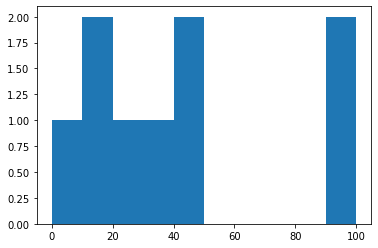

[1. 2. 1. 1. 2. 0. 0. 0. 0. 2.]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


In [109]:
freq, r , _ = plt.hist(sr,bins=10, range=(0,100))
plt.show()
print(freq) # 범위에 속한 데이터 갯수
print(r) # 계급범위

In [113]:
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58, 70, 47, 51, 64, 62, 70, 71,
       68, 73, 37, 65, 65, 61, 52, 57, 57, 75, 61, 47, 54, 66, 54, 54, 42,
       37, 79, 56, 62, 62, 55, 63, 57, 57, 67, 55, 45, 66, 55, 64, 66],
      dtype=int64)

In [116]:
freq,r = np.histogram(scores, bins=10, range=(0,100))
print(freq)
print(r)

[ 0  0  0  2  8 16 18  6  0  0]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


#### 도수값을 데이터프레임으로 표현

In [ ]:
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
freq_class

In [118]:
freq_dist_df = pd.DataFrame({'frequency':freq},
                            index=pd.Index(freq_class,
                                           name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


#### 각 계급의 중앙값이 계급값

In [128]:
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value


[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

#### 상대도수
: 차지하고 있는 비중
- 도수 / 도수의 합

In [130]:
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

#### 누적 상대도수

In [133]:
# 배열의 값들을 누적해서 더해 나감 (마지막은 값들의 총합)

# ex)
aa = np.array([1,2,3,4,5])
np.cumsum(aa)

array([ 1,  3,  6, 10, 15], dtype=int32)

In [131]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

### 도수분포표

In [135]:
freq_dist_df['class value'] = class_value # 계급값 (범위의 중앙값)
freq_dist_df['relative frequency'] = rel_freq # 상대도수
freq_dist_df['cumulative relative frequency'] = cum_rel_freq # 누적도수
freq_dist_df = freq_dist_df[['class value', 'frequency',
                             'relative frequency', 'cumulative relative frequency']]

freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


## 연습 문제 : 수학 점수의 도수분포표를 그리시오.

In [137]:
# 수학점수 데이터 가져오기
math_scores = df['mathematics']

In [138]:
# 10개의 계급으로 나누고 계급에 속한 데이터 갯수 (도수) 알아보기
freq,r = np.histogram(math_scores, bins=10, range=(0,100))
print(freq)
print(r)

[ 0  0  0  0  0  1  6 16 23  4]
[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


In [139]:
# 계급 지정
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
freq_class

['0~10',
 '10~20',
 '20~30',
 '30~40',
 '40~50',
 '50~60',
 '60~70',
 '70~80',
 '80~90',
 '90~100']

In [140]:
# 데이터프레임 생성
math_freq_dist_df = pd.DataFrame({'frequency':freq},
                            index=pd.Index(freq_class,
                                           name='class'))
math_freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,0
40~50,0
50~60,1
60~70,6
70~80,16
80~90,23


In [141]:
# 계급값 생성 (각 계급의 중앙값)
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [142]:
# 상대도수 구하기 (도수 / 도수의 합)
rel_freq = freq / freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.12, 0.32, 0.46, 0.08])

In [143]:
# 누적도수 구하기 .cumsum
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.14, 0.46, 0.92, 1.  ])

In [147]:
math_freq_dist_df['class value'] = class_value # 계급값 (범위의 중앙값)
math_freq_dist_df['relative frequency'] = rel_freq # 상대도수
math_freq_dist_df['cumulative relative frequency'] = cum_rel_freq # 누적도수
math_freq_dist_df = freq_dist_df[['frequency','class value',
                             'relative frequency', 'cumulative relative frequency']]

math_freq_dist_df

,frequency,class value,relative frequency,cumulative relative frequency
class,,,,
0~10,0,5,0.00,0.00
10~20,0,15,0.00,0.00
20~30,0,25,0.00,0.00
30~40,2,35,0.04,0.04
40~50,8,45,0.16,0.20
50~60,16,55,0.32,0.52
60~70,18,65,0.36,0.88
70~80,6,75,0.12,1.00
80~90,0,85,0.00,1.00


### 그래프로 그리기

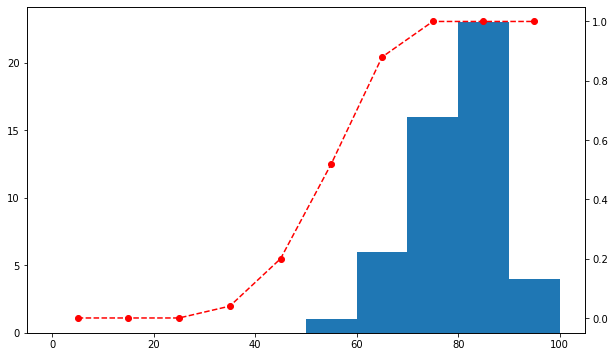

In [178]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot()
ax2 = ax1.twinx() # 왼쪽 y는 ax1데이
freq, r, _ = ax1.hist(math_scores, bins=10, range=(0,100)) # _는 그래프 데이터

# 누적상대도수 표현
ax2.plot(math_freq_dist_df['class value'], math_freq_dist_df['cumulative relative frequency'], 'ro--')

plt.show()